Alexis Williams
IS 390- Class Project


# **Stroke Dataset**

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import neighbors,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
df = pd.read_csv('stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
df.shape

(5110, 12)

In [31]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [32]:
df = df.dropna()

df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [34]:
df = df.drop(df[df['gender'] == "Other"].index)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [35]:
df.shape

(4908, 12)

In [36]:
print(df['gender'].value_counts()['Male'])
print(df['gender'].value_counts()['Female'])

2011
2897


### Question- <u>How likely is a female of any age compared to a male of any age in an urban residence type to have a stroke with a glucose of 100+</u>

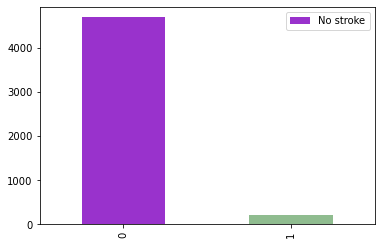

In [37]:
df.stroke.value_counts().plot(kind='bar', color=['darkorchid', 'darkseagreen'])
plt.legend(loc = 'upper right', labels =["No stroke", "Stroke"])


In [38]:
df['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

Interpretation : of the 4,908 samples, less than 500 people have had a stroke

In [39]:
df.describe()[['age', 'avg_glucose_level']]

,age,avg_glucose_level
count,4908.000000,4908.000000
mean,42.868810,105.297402
std,22.556128,44.425550
min,0.080000,55.120000
25%,25.000000,77.067500
50%,44.000000,91.680000
75%,60.000000,113.495000
max,82.000000,271.740000


C:\Users\atwil\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\atwil\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


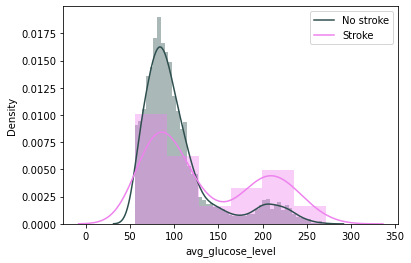

In [40]:
sns.distplot(df[df['stroke']== 0]['avg_glucose_level'], color = 'darkslategrey')
sns.distplot(df[df['stroke']== 1]['avg_glucose_level'], color = 'violet')
plt.legend(loc = 'upper right', labels =["No stroke", "Stroke"])

Interpretation: a normal glucose level for a non diabetic is about 90-140Mg/DL. Those with an elevated glucose level are more likely to have a stroke. Majority of people within the normal range did not have a stroke.

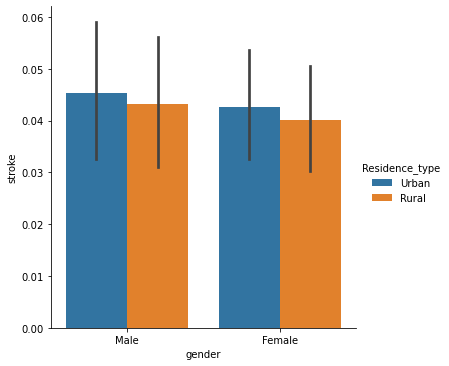

In [41]:
sns.catplot(x= "gender", y="stroke", hue ="Residence_type",
            kind= "bar", data = df)
plt.show()

There isn't much of a gap between Urban and Rural residence types, but the frequency of strokes is higher in urban areas most likely because of pollution. It also seems that the frequency of strokes is slightly higher for males which is probably because of higher rates of induced stress in males than in females

C:\Users\atwil\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\atwil\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


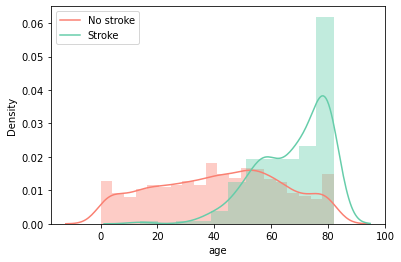

In [42]:
sns.distplot(df[df['stroke']==0]['age'], color = "salmon")
sns.distplot(df[df['stroke']== 1]['age'], color = "mediumaquamarine")
plt.legend(loc = 'upper left', labels =["No stroke", "Stroke"])

Interpretation: age is a contributing feature to having a stroke. As people get older, the risk of stroke increases.

## Data Preprocessing

In [43]:
df1 = df[[ 'gender', 'age', 'Residence_type', 'avg_glucose_level', 'stroke']]
df1

,gender,age,Residence_type,avg_glucose_level,stroke
0,Male,67.0,Urban,228.69,1
2,Male,80.0,Rural,105.92,1
3,Female,49.0,Urban,171.23,1
4,Female,79.0,Rural,174.12,1
5,Male,81.0,Urban,186.21,1
...,...,...,...,...,...
5104,Female,13.0,Rural,103.08,0
5106,Female,81.0,Urban,125.20,0
5107,Female,35.0,Rural,82.99,0
5108,Male,51.0,Rural,166.29,0


In [44]:
df1.describe()[['age', 'avg_glucose_level']].T[['min', 'max']]

,min,max
age,0.08,82.00
avg_glucose_level,55.12,271.74


normalize the numerical values to be between 0 and 1 and Convert the remaing categorical to binary

In [45]:
num = ['avg_glucose_level', 'age']
scaler = StandardScaler()
df1[num]= scaler.fit_transform(df1[num])
df1.head()

<ipython-input-45-239d34813d7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[num]= scaler.fit_transform(df1[num])
C:\Users\atwil\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,gender,age,Residence_type,avg_glucose_level,stroke
0,Male,1.069938,Urban,2.777797,1
2,Male,1.646336,Rural,0.014016,1
3,Female,0.271847,Urban,1.484266,1
4,Female,1.601998,Rural,1.549325,1
5,Male,1.690675,Urban,1.821493,1


In [46]:
df1['gender'] = np.where(df1['gender']=='Female', 1, 0)
df1['Residence_type'] = np.where(df['Residence_type'] == 'Urban', 1, 0)
df1

<ipython-input-46-298580ec52a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'] = np.where(df1['gender']=='Female', 1, 0)
<ipython-input-46-298580ec52a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Residence_type'] = np.where(df['Residence_type'] == 'Urban', 1, 0)


,gender,age,Residence_type,avg_glucose_level,stroke
0,0,1.069938,1,2.777797,1
2,0,1.646336,0,0.014016,1
3,1,0.271847,1,1.484266,1
4,1,1.601998,0,1.549325,1
5,0,1.690675,1,1.821493,1
...,...,...,...,...,...
5104,1,-1.324334,0,-0.049918,0
5106,1,1.690675,1,0.448045,0
5107,1,-0.348890,0,-0.502181,0
5108,0,0.360524,0,1.373057,0


<AxesSubplot:>

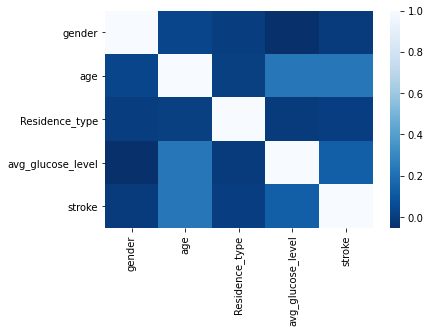

In [47]:
sns.heatmap(df1.corr(), cmap ="Blues_r", data = df1)

In [48]:
df1.corr()

,gender,age,Residence_type,avg_glucose_level,stroke
gender,1.000000,0.030280,0.004351,-0.053161,-0.006904
age,0.030280,1.000000,0.010795,0.236000,0.232313
Residence_type,0.004351,0.010795,1.000000,-0.007441,0.005988
avg_glucose_level,-0.053161,0.236000,-0.007441,1.000000,0.138984
stroke,-0.006904,0.232313,0.005988,0.138984,1.000000


In [49]:
column = ['gender', 'age', 'Residence_type', 'avg_glucose_level']
for column in column:
    lab_enc = preprocessing.LabelEncoder()
    df1[column] = lab_enc.fit_transform(df1[column])

<ipython-input-49-90d103038cbe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = lab_enc.fit_transform(df1[column])


In [50]:
for column in ['age', 'avg_glucose_level']:
    df1[column] = df1[column]/df1[column].max()

<ipython-input-50-7245fbba8571>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = df1[column]/df1[column].max()


In [51]:
values = df1.drop(columns = ['stroke'])

label = df1['stroke']

train_df = df1[:2000]
test_df = df1[2908:]

In [52]:
features =['gender', 'age', 'Residence_type', 'avg_glucose_level']
#split data into train and test set
train_X = np.array(train_df[['gender', 'age', 'Residence_type', 'avg_glucose_level']])
train_y = np.array(train_df['stroke'])
test_X = np.array(train_df[['gender', 'age', 'Residence_type', 'avg_glucose_level']])
test_y = np.array(test_df['stroke'])


In [53]:
model_comparison = {}

**Random Forest Classifier**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier()
rf.fit(train_X, train_y)
prediction = rf.predict(test_X)
model_comparison['RandomForestClassifier'] = [metrics.accuracy_score(test_y, prediction),
                                              f1_score(test_y, prediction,average='weighted')]

print(classification_report(test_y, prediction, zero_division = 0))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.90      2000
   macro avg       0.50      0.45      0.47      2000
weighted avg       1.00      0.90      0.94      2000



**KNN Classification**

In [55]:
knn_mod = neighbors.KNeighborsClassifier(5)
knn_mod.fit(train_X, train_y)
predictions = knn_mod.predict(test_X)
model_comparison['KNeighborsClassifier'] = [metrics.accuracy_score(test_y, prediction), f1_score(test_y, prediction,average='weighted')]

print(classification_report(test_y, prediction, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.90      2000
   macro avg       0.50      0.45      0.47      2000
weighted avg       1.00      0.90      0.94      2000



In [56]:
#from sklearn.linear_model import LogisticRegression

#model = LogisticRegression(max_iter = 1000)
#model.fit(train_X, train_y)
#prediction = model.predict(test_X)
#model_comparison['LogisticRegression'] = [accuracy_score(test_y, prediction), f1_score(test_y, prediction,average='weighted')]

#print(classification_report(prediction, test_y))

In [57]:
#from sklearn import tree
#from sklearn import model_selection

#tree_mod= tree.DecisionTreeClassifier(max_depth = 5)
#scorer = metrics.make_scorer(metrics.cohen_kappa_score)
#grid = {'max_depth': [1,2,3,4,5,6]}

#gridsearch = model_selection.GridSearchCV(tree_mod, grid).fit(train_X,train_y)
#prediction = gridsearch.predict(test_X)
#model_comparison['DecisionTreeClassifier']= [accuracy_score(test_y,predictions), f1_score(test_y,prediction, average='weighted')]

#print(classification_report(test_y, prediction))

In [58]:
model_comparison_df = pd.DataFrame.from_dict(model_comparison).T

model_comparison_df.columns = ['Accuracy', 'F1 Score']
model_comparison_df = model_comparison_df.sort_values('F1 Score', ascending=True)
model_comparison_df.style.background_gradient(cmap='Blues')

,Accuracy,F1 Score
RandomForestClassifier,0.895500,0.944869
KNeighborsClassifier,0.895500,0.944869
